<a href="https://colab.research.google.com/github/Youcheng9/Pytorch_Deep_Learning00-09/blob/main/pytorch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Binary Class Model

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                     noise=0.03,
                     random_state =42)
print(f"First 5 X features:\n{X[:5]}")
print(f"First 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 y labels:
[1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:, 1],
                        "label": y
                        })
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


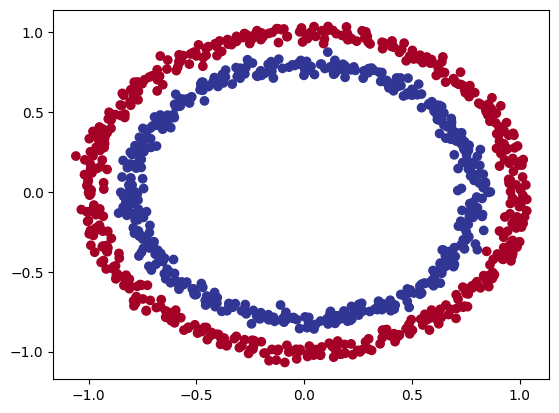

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu);

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample}")
print(f"Value for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074]
Value for one sample of X: (2,) and the same for y: ()


In [ ]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# ## Same as cell above with nn.Sequential
# model_0 = nn.Sequential(
#     nn.Linear(in_features = 2, out_features = 5),
#     nn.Linear(in_features = 5, out_features = 1)
# ).to(device)

# # model_0

In [ ]:
### nn.Sequential is great for straight-forward and sequential order,
# if the computation is not sequential, use nn.Module

In [ ]:
untrained_preds = model_0(X_test.to(device))
print(f"Length of Untrained predictions:\n{len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f" ")

Length of Untrained predictions:
200, Shape: torch.Size([200, 1])
 


In [ ]:
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"First 10 predictions:\n{untrained_preds[:10]}")
print(f"First 10 test labels:\n{y_test[:10]}")

Length of test samples: 200, Shape: torch.Size([200])
First 10 predictions:
tensor([[0.0167],
        [0.0207],
        [0.0126],
        [0.0171],
        [0.0420],
        [0.0239],
        [0.0315],
        [0.0330],
        [0.0116],
        [0.0208]], device='cuda:0', grad_fn=<SliceBackward0>)
First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
loss_function = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.2)

In [ ]:
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()

  acc = (correct / len(y_pred)) * 100

  return acc


In [ ]:
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.0167],
        [0.0207],
        [0.0126],
        [0.0171],
        [0.0420]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5042],
        [0.5052],
        [0.5032],
        [0.5043],
        [0.5105]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [ ]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
torch.manual_seed(42)

epochs = 1000

# Move data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Change loss function to BCELoss and apply sigmoid to model output
loss_function = nn.BCELoss()


for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  # Apply sigmoid to get prediction probabilities
  y_pred_prob = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_prob)

  # Ensure both y_pred_prob and y_train are on the device and are float for BCELoss
  loss = loss_function(y_pred_prob.to(device),
                       y_train.float().to(device))

  acc = accuracy(y_true = y_train.to(device), y_pred = y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred_prob = torch.sigmoid(test_logits)
    test_pred = torch.round(test_pred_prob)
    # Ensure both test_pred_prob and y_test are on the device and are float for BCELoss
    test_loss = loss_function(test_pred_prob.to(device), y_test.float().to(device))
    test_acc = accuracy(y_test.to(device), test_pred)


  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.2f}) | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295 | Accuracy: 50.00% | Test Loss: 0.69) | Test Acc: 50.00%
Epoch: 100 | Loss: 0.68978 | Accuracy: 53.37% | Test Loss: 0.69) | Test Acc: 55.50%
Epoch: 200 | Loss: 0.68518 | Accuracy: 52.75% | Test Loss: 0.68) | Test Acc: 56.50%
Epoch: 300 | Loss: 0.67520 | Accuracy: 54.37% | Test Loss: 0.67) | Test Acc: 56.50%
Epoch: 400 | Loss: 0.65179 | Accuracy: 63.88% | Test Loss: 0.65) | Test Acc: 67.50%
Epoch: 500 | Loss: 0.56917 | Accuracy: 87.50% | Test Loss: 0.57) | Test Acc: 86.50%
Epoch: 600 | Loss: 0.37245 | Accuracy: 97.88% | Test Loss: 0.41) | Test Acc: 92.50%
Epoch: 700 | Loss: 0.30881 | Accuracy: 87.12% | Test Loss: 0.35) | Test Acc: 81.50%
Epoch: 800 | Loss: 0.09464 | Accuracy: 99.88% | Test Loss: 0.13) | Test Acc: 99.50%
Epoch: 900 | Loss: 0.05634 | Accuracy: 99.88% | Test Loss: 0.09) | Test Acc: 99.50%


In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


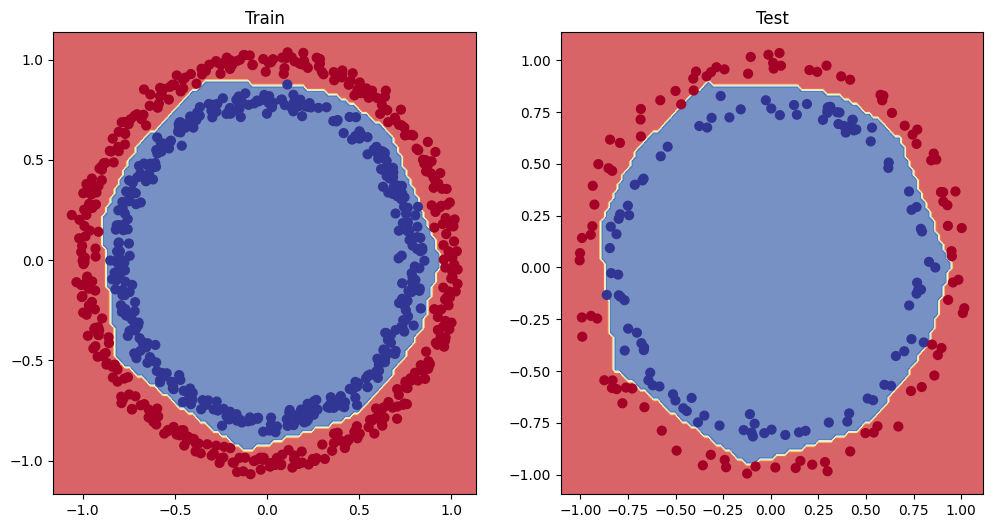

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


#Multi-class Classification


tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


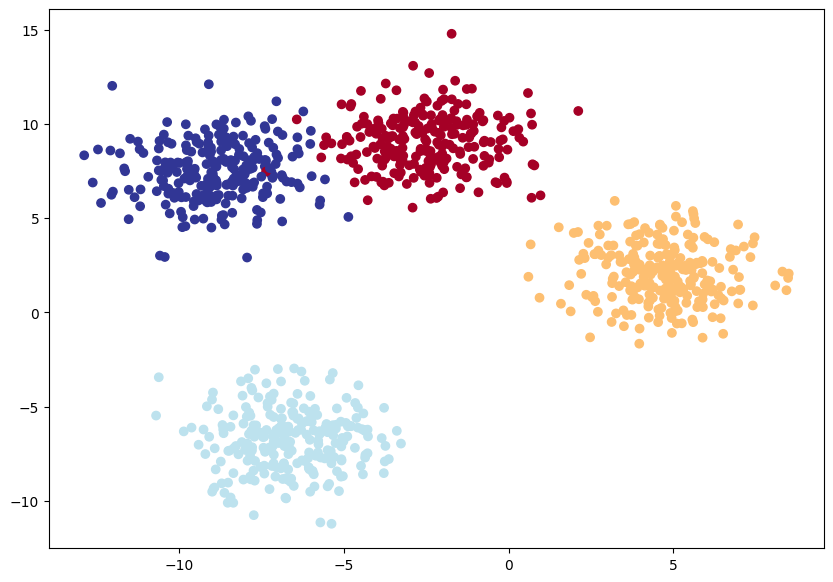

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

num_classes = 4
num_features = 2
random_seed = 42

X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = num_features,
                            centers = num_classes,
                            cluster_std = 1.5,
                            random_state = random_seed)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])


X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = random_seed
                                                                        )
plt.figure(figsize = (10,7))
plt.scatter(X_blob[:,0], X_blob[:, 1], c = y_blob, cmap=plt.cm.RdYlBu);


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from torch import nn

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    super().__init__()
    self.linear_lyaer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self, x):
    return self.linear_lyaer_stack(x)

model_1 = BlobModel(input_features = num_features, output_features = num_classes, hidden_units = 8).to(device)
model_1

BlobModel(
  (linear_lyaer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1)

In [ ]:
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()

  acc = (correct / len(y_pred)) * 100

  return acc


In [ ]:
model_1(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [ ]:
model_1(X_blob_train.to(device))[0].shape, num_classes

(torch.Size([4]), 4)

In [ ]:
y_logits = model_1(X_blob_test.to(device))

y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [ ]:
torch.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_1.train()


  y_logits = model_1(X_blob_train).squeeze()
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  loss = loss_fn(y_logits, y_blob_train)

  acc = accuracy(y_blob_train, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_logits = model_1(X_blob_test)
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy(y_blob_test, test_pred)


  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.2f}) | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324 | Accuracy: 65.50% | Test Loss: 0.58) | Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398 | Accuracy: 99.12% | Test Loss: 0.13) | Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062 | Accuracy: 99.12% | Test Loss: 0.07) | Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924 | Accuracy: 99.12% | Test Loss: 0.05) | Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892 | Accuracy: 99.00% | Test Loss: 0.04) | Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295 | Accuracy: 99.00% | Test Loss: 0.03) | Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910 | Accuracy: 99.00% | Test Loss: 0.03) | Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643 | Accuracy: 99.00% | Test Loss: 0.03) | Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448 | Accuracy: 99.00% | Test Loss: 0.03) | Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300 | Accuracy: 99.12% | Test Loss: 0.02) | Test Acc: 99.50%


In [ ]:
model_1.eval()

with torch.inference_mode():
  y_logits = model_1(X_blob_test)

y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_preds = y_pred_probs.argmax(dim = 1)

print(f"Predictions: {y_preds[:10]} \nLabels: {y_blob_test[:10]}")
print(f"Test Accuracy: {accuracy(y_blob_test, y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0') 
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test Accuracy: 99.5%


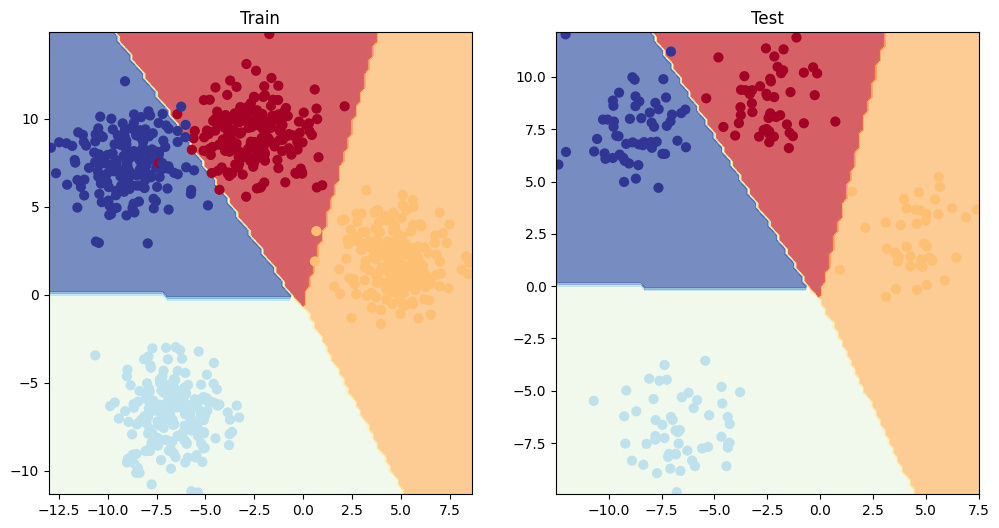

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_blob_test, y_blob_test)

#Exercises

In [ ]:
from sklearn.datasets import make_moons
